# Capstone Project 1: 

## 1) Data Wrangling

In this project, we study customer behaviours of a store in black friday. the data file is provided in kaggle website in csv format: 
https://www.kaggle.com/mehdidag/black-friday

data file includes customer information of around 550,000 observations.the variables are: User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3 and Purchase. 

Data Cleaning: we added few additional columns: Gender Category (binary values), and Age Category (Integer Values), in "Stay_In_Current_City_Years", we changed "+4" to 4 to be a categorical variable. we droped User_ID and Product_ID, since it probably won't help us. we change the type of Product_Category_2 and Product_Category_3 to int64 as well. 

Missing Values: we have missing values in "Product_Category_2" and "Product_Category_3" columns. it just means that specific customer haven't bought from that category, so we replace it with zero, which is helpful in modeling stage. 

Outliers: by using different type of visualizations, we showed that there is no outlier in dataset.

In [1]:
# Check the right path to call the data file
pwd

'C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1'

In [1]:
# Import necessory packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')

## 1.a. Data Cleaning

In [3]:
# We check the column names, they all look ok and descriptive. also, I check to make sure there is no extra space in the names.
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [4]:
# We can find the missing values by using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
# To check the total number of counts in each columns. as stated above, some values are null only in Product_Category_2 and Product_Category_3
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

## 1.b. Missing Values and Continuation of Data Cleaning
We have already found the count of missing values in each column. "Product_Category_2" and "Product_Category_3" columns have missing values. it's very normal. that means some customers haven't bought products 2 and 3. for modeling part, we can fill these Null values by zero.

In [6]:
# Now we fill Null values with zero
df[['Product_Category_2','Product_Category_3']] = df[['Product_Category_2','Product_Category_3']].fillna(0)

In [7]:
# "Stay_In_Current_City_Years" column can change to an integer type. but first, we should take care of "+4" values
df.Stay_In_Current_City_Years.replace("4+",4,inplace=True)

In [8]:
# Drop User_ID and Product_ID columns, since they won't help us in our analysis
#df = df.drop(columns=['User_ID','Product_ID'])

In [9]:
# change the columns to categorical or integer types. this way, data takes less memory as well.
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Product_Category_2'] = df['Product_Category_2'].astype('int64')
df['Product_Category_3'] = df['Product_Category_3'].astype('int64')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')

In [10]:
# Now, we add two additional columns. we categorize Gender and Age with numeric values
# Gender
def Gendr_Categry(x):
    if x.Gender == 'F':
        return 1
    else:
        return 0

df['Gender_Category'] = df.apply(Gendr_Categry, axis = 1)
# Age
def Ag_Cat(x):
    if x.Age == '0-17':
        return 0
    if x.Age == '18-25':
        return 1
    if x.Age == '26-35':
        return 2
    if x.Age == '36-45':
        return 3
    if x.Age == '46-50':
        return 4
    if x.Age == '51-55':
        return 5
    else:
        return 6
df['Age_Category'] = df.apply(Ag_Cat, axis = 1)


In [11]:
# By applying info method, we see how clean data looks so far.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 14 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null category
Age                           537577 non-null category
Occupation                    537577 non-null int64
City_Category                 537577 non-null category
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null category
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null int64
Gender_Category               537577 non-null int64
Age_Category                  537577 non-null int64
dtypes: category(4), int64(9), object(1)
memory usage: 43.1+ MB


## 1.c. Outliers Checking
All these figures and numbers show that there is no outlier value in any of those columns. they all look to be in a specific range. all customers spend money in a specific range and bought the products very similar to each other.

In [12]:
# import the file one more time with a new dataframe name to check the outliers (without replacing missing values)
df2 = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')

In [13]:
# a quick check of .describe() method, doesn't show any outliers. below figures don't show outliers either.
df2[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']].describe()

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.000000,370591.000000,164278.000000,537577.000000
mean,5.295546,9.842144,12.669840,9333.859853
std,3.750701,5.087259,4.124341,4981.022133
min,1.000000,2.000000,3.000000,185.000000
25%,1.000000,5.000000,9.000000,5866.000000
50%,5.000000,9.000000,14.000000,8062.000000
75%,8.000000,15.000000,16.000000,12073.000000
max,18.000000,18.000000,18.000000,23961.000000


# 2. Data Visualization
In this part, we study the characteristics of customers. these are included Age, Marital_Status,Gender, Number of Years Living in That City, and the type of city that they are living. that helps to know what type of customers are more excited about black friday and its offers. it will help to focus to advertise in that particular audience.

## 2.a. Age and Gender
This figure shows that male customers have more interest to buy from this store. and specificuly, most customers are in age group 26-35.other information is represented in chart below.

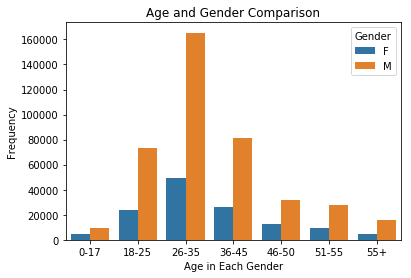

In [14]:
sns.countplot(x='Age',hue='Gender', data=df)
plt.title('Age and Gender Comparison')
plt.xlabel('Age in Each Gender')
plt.ylabel('Frequency')
plt.show()

## 2.b. Age and Marital Status
Highest number of cusromers are single and between 26-35 in black friday. looks like this store has more popularity in single males and age group of 26-35. 

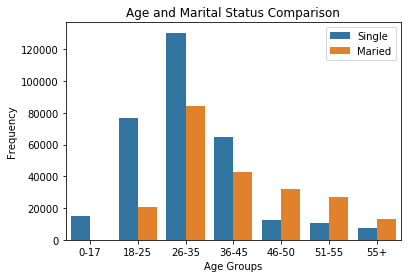

In [15]:
sns.countplot(x='Age',hue='Marital_Status', data=df)
# instead of 0 and 1, we call "Single" and "Maried"
L=plt.legend()
L.get_texts()[0].set_text('Single')
L.get_texts()[1].set_text('Maried')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Age and Marital Status Comparison')
plt.show()

## 2.c. Age and Number of Years Living in the City
Now, let's dig in the type of people who live there. this store has most popularity among those who moved to this city in 1 year. the other type of information has been represented in chart below.

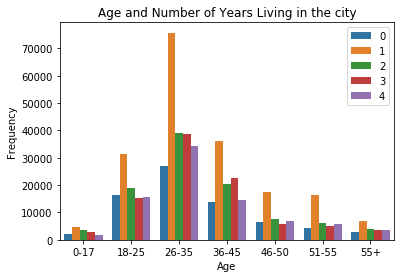

In [16]:
ax = sns.countplot(x='Age',hue='Stay_In_Current_City_Years', data=df)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age and Number of Years Living in the city')
# sort both labels and handles by labels
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels)
plt.show()

## 2.d. Age and City Category
As you see below, main customers live in suburban areas of city, second rank is urban areas, and the last group lives in rural areas.

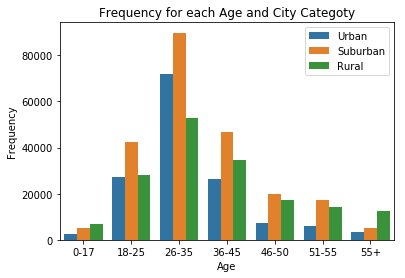

In [17]:
sns.countplot(x='Age',hue='City_Category', data=df)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency for each Age and City Categoty')
# Change the labels in legend
L=plt.legend()
L.get_texts()[0].set_text('Urban')
L.get_texts()[1].set_text('Suburban')
L.get_texts()[2].set_text('Rural')
plt.show()

## 2.e. Fractions of Each Factor
In pie charts below, you will see the percentage of each category for each one of these factors.

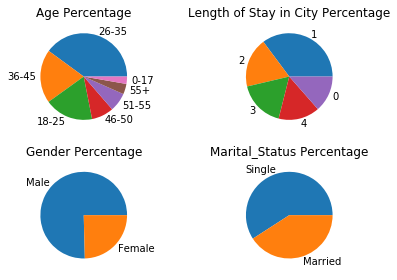

In [18]:
plt.subplot(2,2,1)
x = df['Age'].value_counts()
plt.pie(x,labels=x.index) # ['26-35','36-45','18-25','46-50','51-55','55+','0-17']
plt.title('Age Percentage')
plt.subplot(2,2,2)
y = df['Stay_In_Current_City_Years'].value_counts()
plt.pie(y,labels = y.index) # ['1 year', '2 years','3 years','more than 4 years', 'not living in the city']
plt.title('Length of Stay in City Percentage')
plt.subplot(2,2,3)
y = df['Gender'].value_counts()
plt.pie(y,labels = ['Male','Female'])
plt.title('Gender Percentage')
plt.subplot(2,2,4)
y = df['Marital_Status'].value_counts()
plt.pie(y,labels = ['Single','Married'])
plt.title('Marital_Status Percentage')
plt.tight_layout()
plt.show()

## 2.f. Gender-Marital Status Combination in Each Category of Product
Now, we study combination of Age and Gender in each product category. Single male customers have the highest interest to buy in black friday. this conclusion is correct in all three product categories.

In [19]:
def Gen_Mar(x):
    if x.Gender == 'M' and x.Marital_Status == 0:
        return 'Single Male'
    elif x.Gender == 'F' and x.Marital_Status == 0:
        return 'Single Female'
    elif x.Gender == 'M' and x.Marital_Status == 1:
        return 'Married Male'
    elif x.Gender == 'F' and x.Marital_Status == 1:
        return 'Married Female'
df['Gender_MaritalStatus'] = df.apply(Gen_Mar,axis=1)

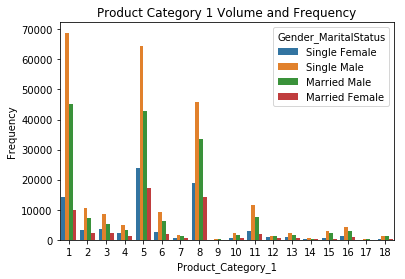

In [20]:
sns.countplot(df['Product_Category_1'],hue=df['Gender_MaritalStatus'])
plt.ylabel('Frequency')
plt.title('Product Category 1 Volume and Frequency')
plt.show()

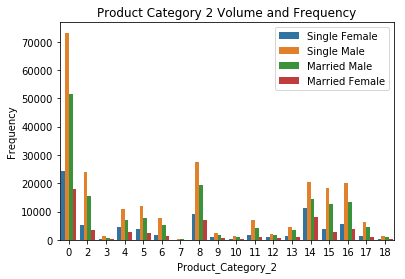

In [21]:
sns.countplot(df['Product_Category_2'],hue=df['Gender_MaritalStatus'])
plt.ylabel('Frequency')
plt.title('Product Category 2 Volume and Frequency')
plt.legend(loc='upper right')
plt.show()

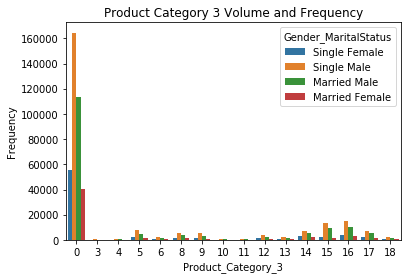

In [22]:
sns.countplot(df['Product_Category_3'],hue=df['Gender_MaritalStatus'])
plt.ylabel('Frequency')
plt.title('Product Category 3 Volume and Frequency')
plt.show()

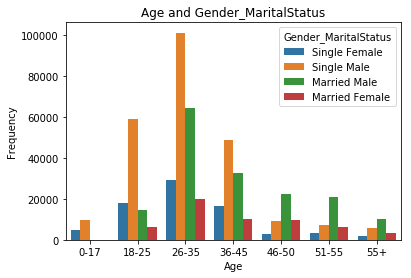

In [23]:
sns.countplot(df['Age'],hue=df['Gender_MaritalStatus'])
plt.ylabel('Frequency')
plt.title('Age and Gender_MaritalStatus')
plt.show()

## 2.g. Purchase and Product Categories Comparison
Box plots show the distribution of values in each one the columns. this is another way to check the outliers. having no outliers shows that all customers are in a specific range of wealth. so advertising equally among customers is very important.
The next chart shows the total purchase dollars among different age groups. again, this chart shows that people in age group 26-35 spent more money.
last 4 charts show the histograms of each product category and purchase.

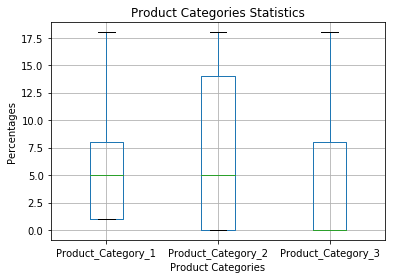

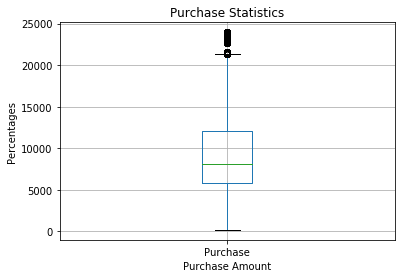

In [24]:
df.boxplot(column = ['Product_Category_1','Product_Category_2','Product_Category_3'])
plt.xlabel('Product Categories')
plt.ylabel('Percentages')
plt.ylabel('Percentages')
plt.title('Product Categories Statistics')
plt.show()
df.boxplot(column = ['Purchase'])
plt.xlabel('Purchase Amount')
plt.ylabel('Percentages')
plt.title('Purchase Statistics')
plt.show()          

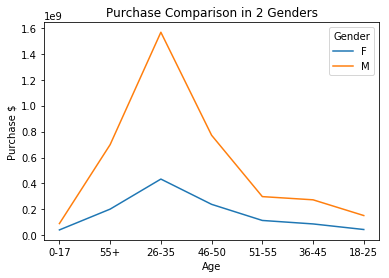

In [25]:
df = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')
df = df.groupby(['Age','Gender']).Purchase.sum()
df = df.unstack('Gender')
ax = df.plot(title = 'Purchase Comparison in 2 Genders')
group_labels = ['','0-17', '55+', '26-35','46-50', '51-55', '36-45','18-25']
ax.set_xticklabels(group_labels)
plt.ylabel('Purchase $')
plt.show()

C:\Users\farad\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\farad\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


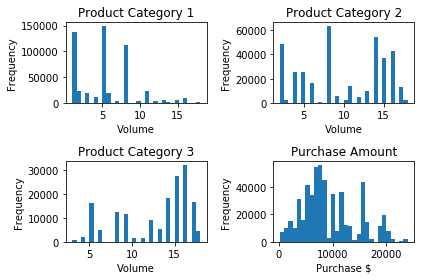

In [26]:
df = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')
plt.subplot(2,2,1)
plt.hist(df['Product_Category_1'],bins = 30)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Product Category 1')
plt.subplot(2,2,2)
plt.hist(df['Product_Category_2'],bins = 30)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Product Category 2')
plt.subplot(2,2,3)
plt.hist(df['Product_Category_3'],bins = 30)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Product Category 3')
plt.subplot(2,2,4)
plt.hist(df['Purchase'],bins = 30)
plt.xlabel('Purchase $')
plt.ylabel('Frequency')
plt.title('Purchase Amount')
plt.tight_layout()
plt.show()

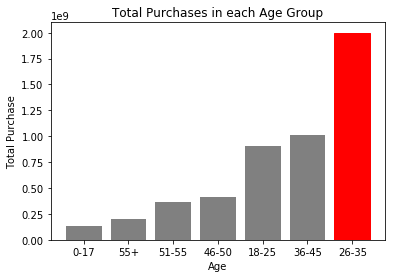

In [27]:
age_purchases = df.groupby('Age')['Purchase'].sum().sort_values()
barlist = plt.bar(age_purchases.index,age_purchases, data=df,color='grey')
plt.xlabel('Age')
plt.ylabel('Total Purchase')
plt.title('Total Purchases in each Age Group')
barlist[6].set_color('r')
# for a,b in zip(x, y):
   # plt.text(a, b, str(b))
plt.show()

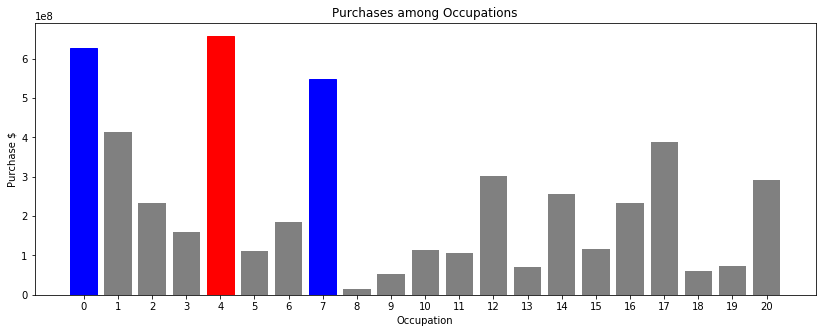

In [28]:
occupation_purchases = df.groupby('Occupation')['Purchase'].sum()
fig,ax = plt.subplots(figsize=(14,5))
barlist = ax.bar(occupation_purchases.index,occupation_purchases,data = df, color='grey')
# this part fixed the issue of x-axis values
ax.set_xticks(np.arange(len(occupation_purchases)))
ax.set_xticklabels(occupation_purchases.index)
# highligh the talest bars
barlist[4].set_color('r')
barlist[0].set_color('b')
barlist[7].set_color('b')
plt.xlabel('Occupation')
plt.ylabel('Purchase $')
plt.title('Purchases among Occupations')
plt.show()

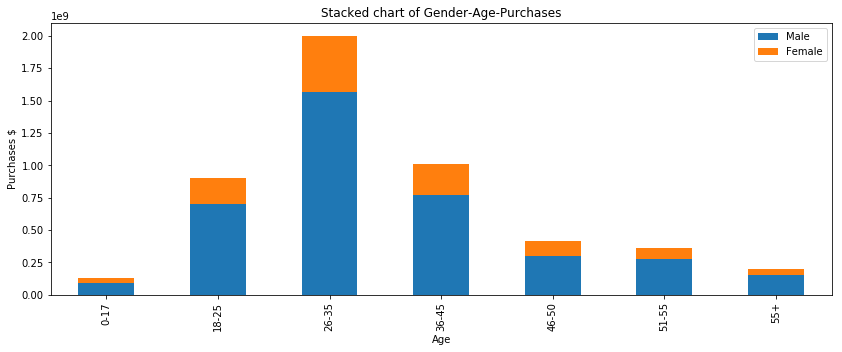

In [29]:
male_purchases_by_age = list(df[['Age','Gender','Purchase']].loc[df.Gender == 'M'].groupby(['Age', 'Gender']).Purchase.sum())
female_purchases_by_age = list(df[['Age','Gender','Purchase']].loc[df.Gender == 'F'].groupby(['Age', 'Gender']).Purchase.sum())
df_structured = pd.DataFrame(index= ['0-17','18-25','26-35','36-45','46-50','51-55','55+'], data={'Male':male_purchases_by_age,
                                                                                   'Female':female_purchases_by_age})

df_structured.plot(kind="bar", stacked=True, figsize=(14,5))
plt.xlabel('Age')
plt.ylabel('Purchases $')
plt.title('Stacked chart of Gender-Age-Purchases')
plt.show()

C:\Users\farad\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


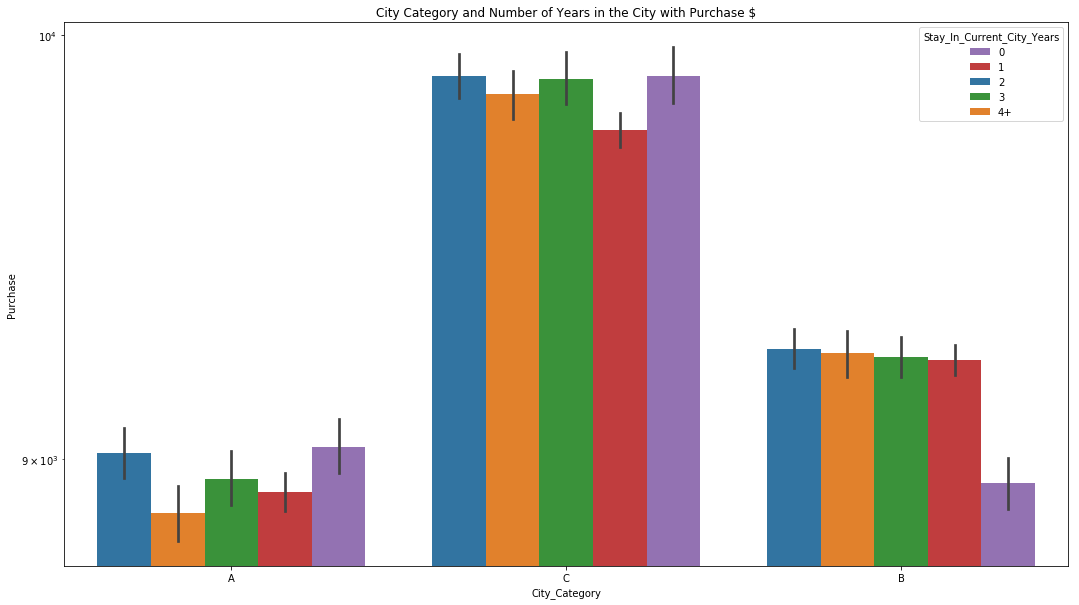

In [30]:
fig,ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(x='City_Category', y='Purchase',hue = 'Stay_In_Current_City_Years', data=df)
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, title = 'Stay_In_Current_City_Years')
plt.yscale('log')
plt.title('City Category and Number of Years in the City with Purchase $')
plt.show()

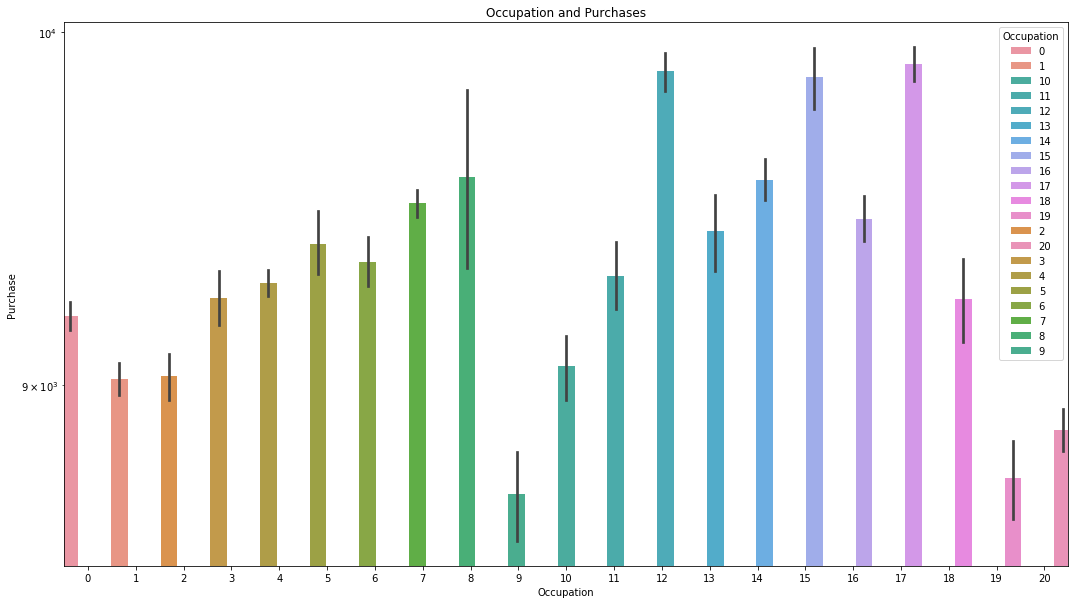

In [31]:
fig,ax = plt.subplots(figsize=(18,10))
ax = sns.barplot(x='Occupation', ax = ax, y='Purchase',hue = 'Occupation', data=df)
# to change the width of the bars bigger
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .35)

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, title = 'Occupation', loc= 'upper right')
plt.yscale('log')
plt.title('Occupation and Purchases')
plt.show()

Text(0.5, 1.0, 'Product Category 1 vs. Purchase $')

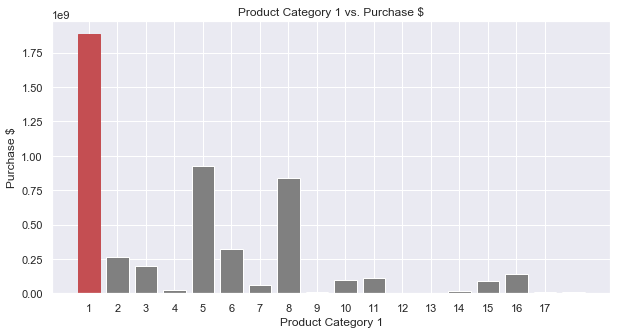

In [32]:
Cat1_Purchases = df.groupby('Product_Category_1').Purchase.sum()
sns.set()
fig,ax = plt.subplots(figsize=(10,5))
barlist = ax.bar(Cat1_Purchases.index,Cat1_Purchases, color = 'grey')
# this part fixed the issue of x-axis values
ax.set_xticks(np.arange(1,len(Cat1_Purchases)))
ax.set_xticklabels(Cat1_Purchases.index)
# we highlight the highest value
barlist[0].set_color('r')
plt.xlabel('Product Category 1')
plt.ylabel('Purchase $')
plt.title('Product Category 1 vs. Purchase $')

Text(0.5, 1.0, 'Product Category 2 vs. Purchase $')

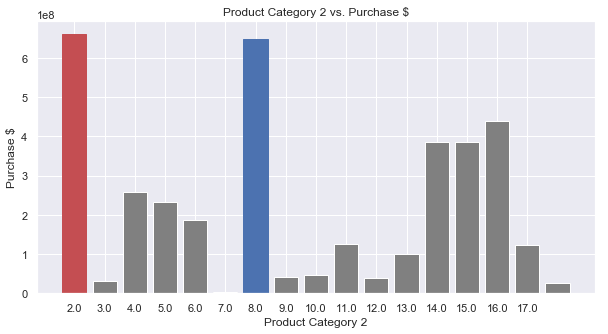

In [33]:
Cat2_Purchases = df.groupby('Product_Category_2').Purchase.sum()
sns.set()
fig,ax = plt.subplots(figsize=(10,5))
barlist = ax.bar(Cat2_Purchases.index,Cat2_Purchases, color = 'grey')
# this part fixed the issue of x-axis values
ax.set_xticks(np.arange(2,len(Cat2_Purchases)+1))
ax.set_xticklabels(Cat2_Purchases.index)
# we highlight the highest value
barlist[0].set_color('r')
barlist[6].set_color('b')
plt.xlabel('Product Category 2')
plt.ylabel('Purchase $')
plt.title('Product Category 2 vs. Purchase $')

Text(0.5, 1.0, 'Product Category 3 vs. Purchase $')

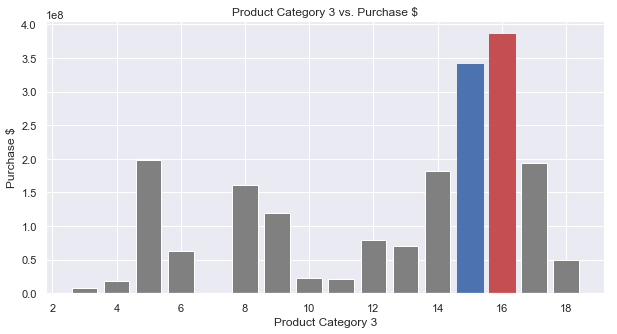

In [34]:
Cat3_Purchases = df.groupby('Product_Category_3').Purchase.sum()
sns.set()
fig,ax = plt.subplots(figsize=(10,5))
barlist = ax.bar(Cat3_Purchases.index,Cat3_Purchases, color = 'grey')
# we highlight the highest value
barlist[12].set_color('r')
barlist[11].set_color('b')
plt.xlabel('Product Category 3')
plt.ylabel('Purchase $')
plt.title('Product Category 3 vs. Purchase $')

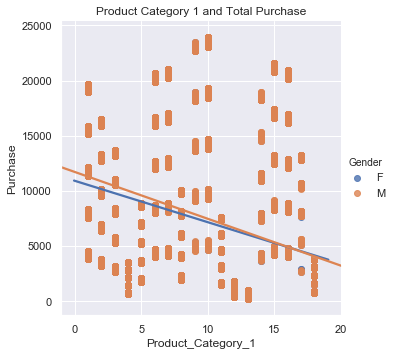

In [35]:
sns.lmplot(x='Product_Category_1', y= 'Purchase', data=df, hue='Gender')
plt.title('Product Category 1 and Total Purchase')
plt.show()

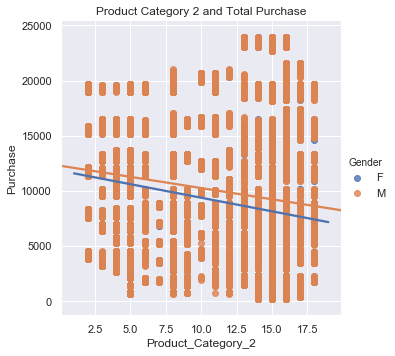

In [36]:
sns.lmplot(x='Product_Category_2', y= 'Purchase', data=df, hue='Gender')
plt.title('Product Category 2 and Total Purchase')
plt.show()

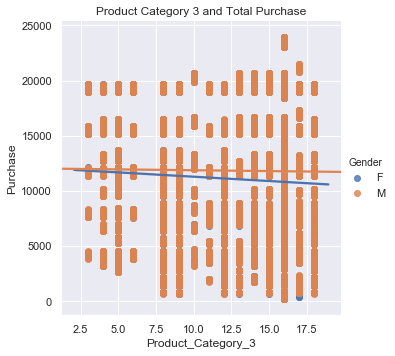

In [37]:
sns.lmplot(x='Product_Category_3', y= 'Purchase', data=df, hue='Gender')
plt.title('Product Category 3 and Total Purchase')
plt.show()

# 3. statistical Inference
In this section, we perfrom statistical analysis, we study the distribution of dataset and correlation of the data.Hypothesis testing can give us insight about each group of customers.Purchase column is the only continous variable, so we studied its distribution. it's close to normal distribution, but the below figure and test rejects that the purchase data is normal distribution. looking back the hisograms shows that only data that close to normal distribution is purchase values. the other columns don't look nomral.

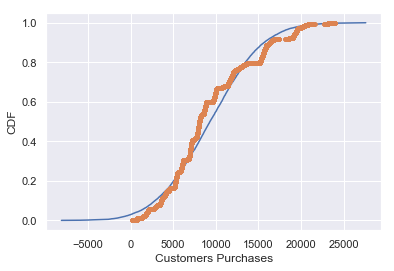

In [38]:
# studying data distribution by using the graph
mean_temp = np.mean(df['Purchase'])
std_temp = np.std(df['Purchase'])
samples_tmp = np.random.normal(mean_temp,std_temp,size=10000)
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y
x,y =ecdf(df['Purchase'])
x_theor,y_theor = ecdf(samples_tmp)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker = '.', linestyle = 'none')
_ = plt.xlabel('Customers Purchases')
_ = plt.ylabel('CDF')
plt.show()

In [39]:
# Using D'Agostino and Pearson's Test for normality test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = df['Purchase']
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=33564.582, p=0.000
Sample does not look Gaussian (reject H0)


Now let's answer some of the questions:
## 3.a) Do customers in a specific city category significantly pay more in the store?
Since we have 3 groups (instead of 2 groups), 2 sample t test or 2 sample z test are not useful for testing the averages. instead, we should use one way ANOVA method.

In [40]:
Urban_Area = df['Purchase'].loc[df.City_Category == 'A']
Suburban_Area = df['Purchase'].loc[df.City_Category == 'B']
Rural_Area = df['Purchase'].loc[df.City_Category == 'C']
from scipy import stats
 
F, p = stats.f_oneway(Urban_Area, Suburban_Area, Rural_Area)
F, p

(1376.6587765751206, 0.0)

Results above show that the mean in at least one city category is higher than the other one. we perform turkey test to find that pair.

In [41]:
# Turkey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['Purchase'],df['City_Category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper   reject
-----------------------------------------------
  A      B    240.6468 201.4538 279.8399  True 
  A      C    886.4308 844.5732 928.2885  True 
  B      C    645.784  608.1905 683.3775  True 
-----------------------------------------------
['A' 'B' 'C']


In [42]:
Urban_Avg = np.mean(Urban_Area)
Suburban_Avg = np.mean(Suburban_Area)
Rural_Avg = np.mean(Rural_Area)
(Urban_Avg,Suburban_Avg,Rural_Avg)

(8958.011013703177, 9198.657848145418, 9844.44185501604)

Results above show that each category has significant differnece with the other two categories.
with that said, customers in city category C spend more money compared to city category B and B spend more money compared to A.

## 3.b) Does an age group/gender pay more in black Friday?

In [43]:
# age groups
from scipy import stats
F, p = stats.f_oneway(df['Purchase'].loc[df.Age == '0-17'],df['Purchase'].loc[df.Age == '18-25'],df['Purchase'].loc[df.Age == '26-35'],df['Purchase'].loc[df.Age == '36-45'],df['Purchase'].loc[df.Age == '46-50'],df['Purchase'].loc[df.Age == '51-55'],df['Purchase'].loc[df.Age == '55+'])
F,p

(43.48718107271441, 1.9552104879020313e-53)

In [44]:
# Turkey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['Purchase'],df['Age'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower    upper   reject
-------------------------------------------------
 0-17  18-25   215.0707  85.2053  344.936   True 
 0-17  26-35   294.4621  169.3173 419.6068  True 
 0-17  36-45   381.3519  252.269  510.4348  True 
 0-17  46-50   264.7454  125.1087 404.3821  True 
 0-17  51-55   600.4897  457.7051 743.2744  True 
 0-17   55+    433.7717  275.7538 591.7896  True 
18-25  26-35   79.3914   22.7175  136.0653  True 
18-25  36-45   166.2812  101.3727 231.1897  True 
18-25  46-50   49.6747   -34.2845 133.6339 False 
18-25  51-55   385.419   296.3226 474.5155  True 
18-25   55+    218.701   106.8065 330.5955  True 
26-35  36-45   86.8898   32.0325  141.747   True 
26-35  46-50   -29.7167 -106.1715 46.7381  False 
26-35  51-55   306.0276  223.9644 388.0909  True 
26-35   55+    139.3096  32.9302  245.6891  True 
36-45  46-50  -116.6065 -199.3502 -33.8627  True 
36-45  51-55   219.1379  131.1858 307.0899  True 

As seen above, most of the age groups have significant mean compare to other age groups.

Since we have just 2 genders in dataset (Male, Female), we can use 2 sample Z test (since the sample size is more than 30)

In [45]:
# Gender
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Purchase'].loc[df.Gender == 'M'], x2=df['Purchase'].loc[df.Gender == 'F'], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [46]:
np.mean(df['Purchase'].loc[df.Gender == 'M']),np.mean(df['Purchase'].loc[df.Gender == 'F'])

(9504.771712960679, 8809.761348593387)

The amount of purchases among men is significantly higher than women.

## 3.c) Does Marital Status have influence on purchases during black Friday?

In [47]:
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Purchase'].loc[df.Marital_Status == 0], x2=df['Purchase'].loc[df.Marital_Status == 1], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.9246361475576921
accept null hypothesis


So single and married customers pay almost same in black friday.

## 3.d) Are any of the above significantly more interested to any product category?

In [48]:
# First we make a new column that sums up the product categories of each record. values are 1,2 or 3
df = pd.read_csv('C:\\Users\\farad\\Springboard-Career Track\\Capstone Project 1\\BlackFriday.csv')
df[['Product_Category_2','Product_Category_3']] = df[['Product_Category_2','Product_Category_3']].fillna(0)
def prod_cat_comb(x):
    Prod_Categories = int()
    if x.Product_Category_1 != 0:
        Prod_Categories += 1
    if x.Product_Category_2 != 0:
        Prod_Categories += 1
    if x.Product_Category_3 != 0:
        Prod_Categories += 1
    return Prod_Categories
df['product_categories'] = df.apply(prod_cat_comb,axis=1)

In [49]:
# age groups vs. product categories
# if the value of new column is 1, that customer just purchased product_category_1, if 2, that customer purchased both product categories 1 and 2, and if it is 3, the customer purchased from all categories.
from scipy import stats
F, p = stats.f_oneway(df['product_categories'].loc[df.Age == '0-17'],df['product_categories'].loc[df.Age == '18-25'],df['product_categories'].loc[df.Age == '26-35'],df['product_categories'].loc[df.Age == '36-45'],df['product_categories'].loc[df.Age == '46-50'],df['product_categories'].loc[df.Age == '51-55'],df['product_categories'].loc[df.Age == '55+'])
F,p

(43.084547141646496, 6.419658801054938e-53)

We have significant results of each age group to buy each product category. so we perform the turkey test.

In [50]:
# Turkey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['product_categories'],df['Age'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 0-17  18-25  -0.0218  -0.0423 -0.0013  True 
 0-17  26-35  -0.0421  -0.0618 -0.0223  True 
 0-17  36-45  -0.0426  -0.0629 -0.0222  True 
 0-17  46-50  -0.0586  -0.0806 -0.0366  True 
 0-17  51-55  -0.0625   -0.085  -0.04   True 
 0-17   55+   -0.0979  -0.1228  -0.073  True 
18-25  26-35  -0.0203  -0.0292 -0.0113  True 
18-25  36-45  -0.0208   -0.031 -0.0106  True 
18-25  46-50  -0.0368   -0.05  -0.0236  True 
18-25  51-55  -0.0407  -0.0547 -0.0266  True 
18-25   55+   -0.0761  -0.0938 -0.0585  True 
26-35  36-45  -0.0005  -0.0092  0.0081 False 
26-35  46-50  -0.0165  -0.0286 -0.0045  True 
26-35  51-55  -0.0204  -0.0333 -0.0075  True 
26-35   55+   -0.0559  -0.0726 -0.0391  True 
36-45  46-50   -0.016  -0.0291  -0.003  True 
36-45  51-55  -0.0199  -0.0337  -0.006  True 
36-45   55+   -0.0553  -0.0728 -0.0378  True 
46-50  51-55  -0.0039  -0.020

In [51]:
# Example:
# in the first row, results is -0.0218
np.mean(df['product_categories'].loc[df.Age == '0-17']), np.mean(df['product_categories'].loc[df.Age == '18-25'])
# since we reject H0, and 0-17 average is higher, that means age group 0-17 has more interest to both categories 1 and 2.

(2.0372611681512205, 2.015476166089682)

In [52]:
# gender vs. product category 1
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Product_Category_1'].loc[df.Gender == 'M'], x2=df['Product_Category_1'].loc[df.Gender == 'F'], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.109644958900916e-246
reject null hypothesis


In [53]:
np.mean(df['Product_Category_1'].loc[df.Gender == 'M']),np.mean(df['Product_Category_1'].loc[df.Gender == 'F'])

(5.197747792194978, 5.595444677261965)

Women are signicantly more interested in product category 1

In [54]:
# gender vs. product category 2
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Product_Category_2'].loc[df.Gender == 'M'], x2=df['Product_Category_2'].loc[df.Gender == 'F'], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.2467507222882599
accept null hypothesis


In product category 2, both men and women have same interests,

In [55]:
# gender vs. product category 3
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Product_Category_3'].loc[df.Gender == 'M'], x2=df['Product_Category_3'].loc[df.Gender == 'F'], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.7461875368876264e-152
reject null hypothesis


In [56]:
np.mean(df['Product_Category_3'].loc[df.Gender == 'M']),np.mean(df['Product_Category_3'].loc[df.Gender == 'F'])

(3.9999185948986136, 3.478815706861729)

Men are signifantly more interested in product category 3.

In [57]:
# Marital Status vs. Product Category 1
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Product_Category_1'].loc[df.Marital_Status == 0], x2=df['Product_Category_1'].loc[df.Marital_Status == 1], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.6572086419296102e-51
reject null hypothesis


In [58]:
np.mean(df['Product_Category_1'].loc[df.Marital_Status == 0]),np.mean(df['Product_Category_1'].loc[df.Marital_Status == 1])

(5.231466535773731, 5.388218966144885)

Singles are significantly more interested in product category 1.

In [59]:
# Marital Status vs. Product Category 2
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Product_Category_2'].loc[df.Marital_Status == 0], x2=df['Product_Category_2'].loc[df.Marital_Status == 1], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.4008867986414234
accept null hypothesis


Both singles and married customers have same interest to product category 2.

In [60]:
# Marital Status vs. Product Category 3
from statsmodels.stats import weightstats as stests
import numpy as np
ztest ,pval = stests.ztest(x1=df['Product_Category_3'].loc[df.Marital_Status == 0], x2=df['Product_Category_3'].loc[df.Marital_Status == 1], value=0,alternative='two-sided')
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0013774916683619383
reject null hypothesis


In [61]:
np.mean(df['Product_Category_3'].loc[df.Marital_Status == 0]),np.mean(df['Product_Category_3'].loc[df.Marital_Status == 1])

(3.8945084750029104, 3.8388924281033856)

Again, singles are signicantly more interested in product category 3.

## 3.e) Does any product category encourage customers to spend more money?

In [62]:
from scipy import stats
F, p = stats.f_oneway(df['Purchase'].loc[df.Product_Category_1 > 0],df['Purchase'].loc[df.Product_Category_2 > 0],df['Purchase'].loc[df.Product_Category_3 > 0])
F,p

(13438.766989103835, 0.0)

based on the result, we will reject at least one pair of averages, so we should perform the turkey test.

In [63]:
# Turkey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['Purchase'],df['product_categories'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower     upper   reject
--------------------------------------------------
  1      2    1110.7764 1074.4135 1147.1393  True 
  1      3    3965.1473 3926.7598 4003.5349  True 
  2      3    2854.3709 2817.8428 2890.8991  True 
--------------------------------------------------
[1 2 3]


In [64]:
np.mean(df['Purchase'].loc[df.Product_Category_1 > 0]),np.mean(df['Purchase'].loc[df.Product_Category_2 > 0]), np.mean(df['Purchase'].loc[df.Product_Category_3 > 0])

(9333.859852635065, 10071.934947151982, 11661.001686166133)

Again 1 means just product category 1, 2 means product categories 1 and 2, and 3 means all product categories. based on the results, product category 3 has the highest impact on total purchases. and all 3 product categories have impact on sale.